In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input -- Share number uncertain before 2013
## Hardcoded block

In [21]:
evaluate_last_X_years = False
X=7
currency_pair = 'NOK=X'
numbers_in_currency = 'NOK'
share_name = 'GSF.OL'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount
## Pull historical USD national currency rates to dividend & calculate historical dividend in USD

In [22]:
# ticker_share = yf.Ticker(share_name)
# dividend = ticker_share.history(period='max', interval="1wk")
# dividend = dividend[dividend['Dividends'] > 0]
# dividend = dividend.rename(columns={'Dividends': 'local_amount'})

# dividend['real_date'] = dividend.index 
# dividend['real_date'] = dividend['real_date'].dt.tz_localize(None)

# dividend = dividend[['real_date', 'local_amount']]

# dividend['usd_rate'] = daily_price(ticker=currency_pair, end=dividend['real_date'], days_earlier=3)
# dividend['currency'] = [currency_pair.split(sep='=')[0] for x in range(len(dividend))]
# dividend['usd_dividend'] = dividend['local_amount'] / dividend['usd_rate']

# dividend.head()

## Extend your input statement table with historical dividend data and calculate share prices!

# 1.2. Raw input statement data

In [23]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [24]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2008-03-31,350,-209,141,-40,0,-153,-26,-79,-23,...,645,645,-546,0,0,0,-546,0,158,112
1,2008-06-30,344,-181,163,-39,0,-24,-29,70,-19,...,-153,-153,5,0,0,0,5,0,-102,112
2,2008-09-30,436,-238,198,-36,0,-157,0,5,-4,...,-82,-82,95,0,0,0,95,0,2,112
3,2008-12-31,358,-223,134,-50,0,-524,0,-439,-98,...,-33,-33,3,0,0,0,3,0,-15,112
4,2009-03-31,284,-115,169,-42,0,17,27,171,-47,...,-35,-35,21,0,0,0,21,-2,-4,112


## Calculate date when quaterly reports could be available

In [25]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [26]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
58,2022-09-30,2022-10-21,112,1709,-760,949,-279,2175,178,234,...,1600,13390,823,0,369,1773,3575,6783,507,-160
59,2022-12-31,2023-02-11,112,1640,-586,1054,62,643,259,240,...,1478,12875,717,0,369,1849,3492,6390,-148,-160
60,2023-03-31,2023-04-21,112,1546,-415,1131,427,243,210,216,...,1524,13222,494,0,363,1547,3429,6195,99,-276
61,2023-06-30,2023-07-21,112,2372,-954,1419,-4,802,321,211,...,1562,13632,633,0,420,2613,3661,7573,709,-185
62,2023-09-30,2023-10-21,112,1164,-383,781,-100,286,203,202,...,1534,13076,759,0,443,2199,3606,6915,-380,-145


## Pull historical average USD national currency rates and add to the dataframe

In [27]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
58,2022-09-30,2022-10-21,112,1709,-760,949,-279,2175,178,234,...,13390,823,0,369,1773,3575,6783,507,-160,9.966961
59,2022-12-31,2023-02-11,112,1640,-586,1054,62,643,259,240,...,12875,717,0,369,1849,3492,6390,-148,-160,10.186402
60,2023-03-31,2023-04-21,112,1546,-415,1131,427,243,210,216,...,13222,494,0,363,1547,3429,6195,99,-276,10.221379
61,2023-06-30,2023-07-21,112,2372,-954,1419,-4,802,321,211,...,13632,633,0,420,2613,3661,7573,709,-185,10.699984
62,2023-09-30,2023-10-21,112,1164,-383,781,-100,286,203,202,...,13076,759,0,443,2199,3606,6915,-380,-145,10.483742


## Convert USD values related to IS, BS, CFS to national currency

In [28]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
58,2022-09-30,2022-10-21,112,1709,-760,949,-279,2175,178,234,...,13390,823,0,369,1773,3575,6783,507,-160,9.966961
59,2022-12-31,2023-02-11,112,1640,-586,1054,62,643,259,240,...,12875,717,0,369,1849,3492,6390,-148,-160,10.186402
60,2023-03-31,2023-04-21,112,1546,-415,1131,427,243,210,216,...,13222,494,0,363,1547,3429,6195,99,-276,10.221379
61,2023-06-30,2023-07-21,112,2372,-954,1419,-4,802,321,211,...,13632,633,0,420,2613,3661,7573,709,-185,10.699984
62,2023-09-30,2023-10-21,112,1164,-383,781,-100,286,203,202,...,13076,759,0,443,2199,3606,6915,-380,-145,10.483742


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [29]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [30]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [31]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [32]:
obj = yf.Ticker(share_name)
share_price = obj.history(interval="1wk", start=data.date.min(), end=pd.Timestamp.now())
# add new date column due to pd.merge_asof match
share_price['real_date'] = share_price.index
# remove localization (timezone) to let merge the two columns
share_price['real_date'] = share_price['real_date'].dt.tz_localize(None)
# add share price column and keep the date and share prices
share_price['share_price'] = share_price['Close']
share_price = share_price[['real_date', 'share_price']]

share_price.tail()

,real_date,share_price
Date,,
2024-01-22 00:00:00+01:00,2024-01-22,65.400002
2024-01-29 00:00:00+01:00,2024-01-29,66.800003
2024-02-05 00:00:00+01:00,2024-02-05,66.500000
2024-02-12 00:00:00+01:00,2024-02-12,66.599998
2024-02-19 00:00:00+01:00,2024-02-19,63.000000


## Merge the statement dataset with share prices

In [33]:
merged_nat_curr = pd.merge_asof(left=share_price, right=ratios_nat_curr, on='real_date', direction='backward')
# drop rows with np.Nan and reset index
merged_nat_curr = merged_nat_curr.dropna()
merged_nat_curr = merged_nat_curr.reset_index(drop=True)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2008-04-21,9.591196,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
1,2008-04-28,9.358077,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
2,2008-05-05,9.324773,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
3,2008-05-12,9.324773,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
4,2008-05-19,8.925140,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [34]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,current_ratio,...,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
0,2008-04-21,9.591196,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.795598,0.901943,0.767296,4.551754
1,2008-04-28,9.358077,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.679039,0.880021,0.748646,4.441121
2,2008-05-05,9.324773,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.662386,0.876889,0.745982,4.425316
3,2008-05-12,9.324773,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.662386,0.876889,0.745982,4.425316
4,2008-05-19,8.925140,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,2.280342,...,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.462570,0.839308,0.714011,4.235660


# Calculate Dividend yield and currency-share price correlation

In [35]:
obj = yf.Ticker(currency_pair)
obj2 = yf.Ticker(share_name)
usd_nat_curr = obj.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
usd_nat_curr['date'] = usd_nat_curr.index
usd_nat_curr['date'] = usd_nat_curr['date'].dt.tz_localize(None)
usd_nat_curr['currency_rate'] = usd_nat_curr['Close']

In [36]:
share_all_price = obj2.history(interval="1d", start=merged_nat_curr['real_date'].min(), end=pd.Timestamp.now())
share_all_price['date'] = share_all_price.index
share_all_price['date'] = share_all_price['date'].dt.tz_localize(None)
share_all_price['share_price'] = share_all_price['Close']
share_all_price['dividend_yield'] = share_all_price['Dividends'] * 100 / share_all_price['Close']

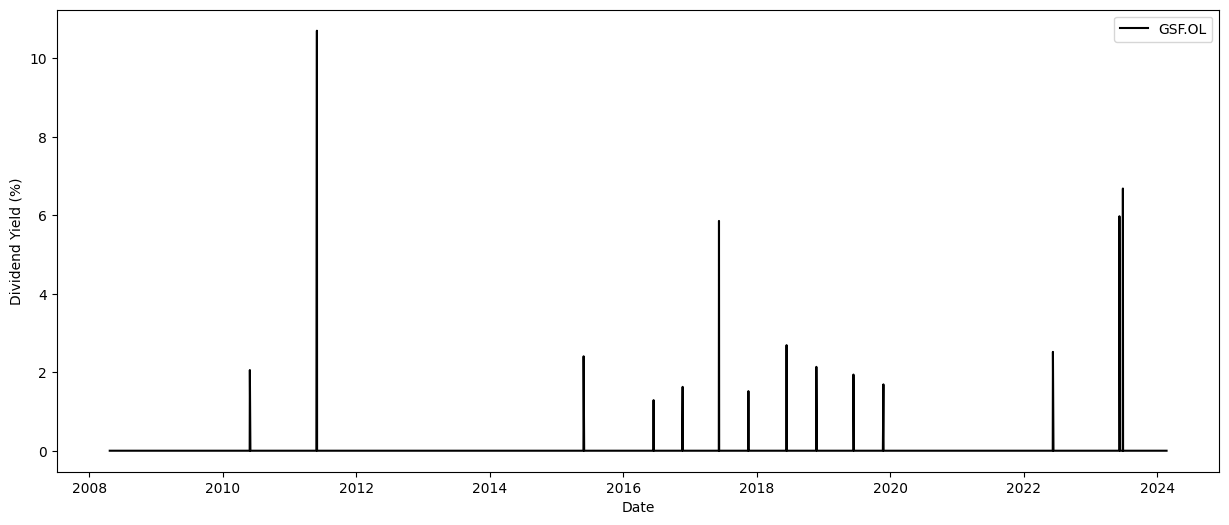

In [37]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(share_all_price.index, share_all_price['dividend_yield'], color='k', label=share_name)

ax1.set_xlabel('Date')
ax1.set_ylabel('Dividend Yield (%)', color='k')

plt.legend()
plt.show()

In [38]:
share_price_currency_rate_correlation = pd.merge_asof(left=usd_nat_curr, right=share_all_price, on='date')
share_price_currency_rate_correlation.index = share_price_currency_rate_correlation['date']
share_price_currency_rate_correlation = share_price_currency_rate_correlation[['currency_rate', 'share_price']]

share_price_currency_rate_correlation.corr()['share_price']

currency_rate    0.812759
share_price      1.000000
Name: share_price, dtype: float64

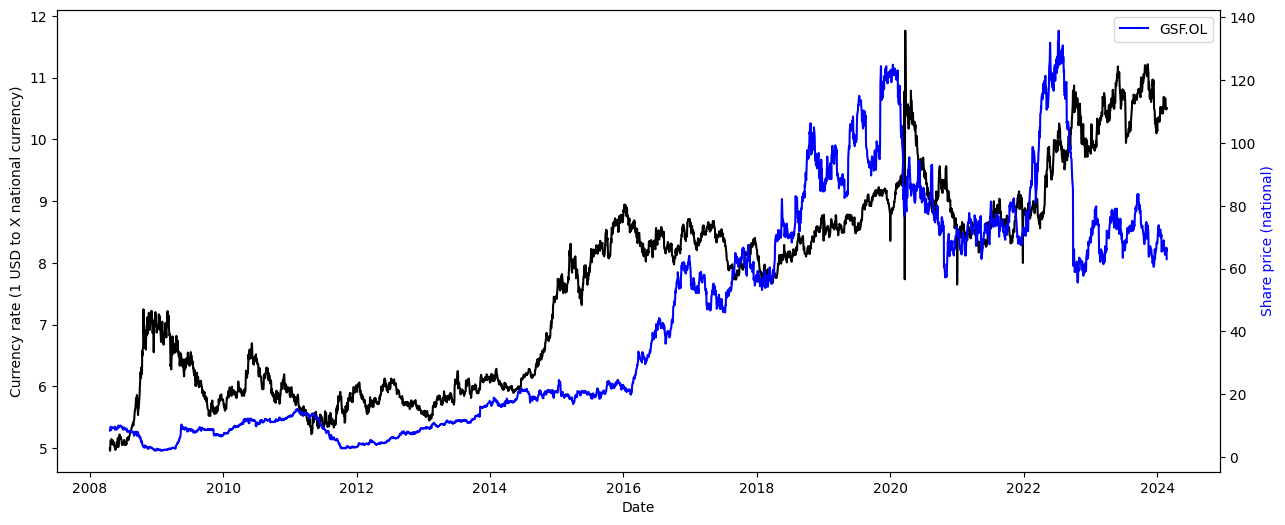

In [39]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax2 = ax1.twinx()
ax1.plot(usd_nat_curr.index, usd_nat_curr['Close'], color='k', label='USD / national currency')
ax2.plot(share_all_price.index, share_all_price['Close'], color='b', label=share_name)

ax1.set_xlabel('Date')
ax1.set_ylabel('Currency rate (1 USD to X national currency)', color='k')
ax2.set_ylabel('Share price (national)', color='b')

plt.legend()
plt.show()

# Share price and value ratios

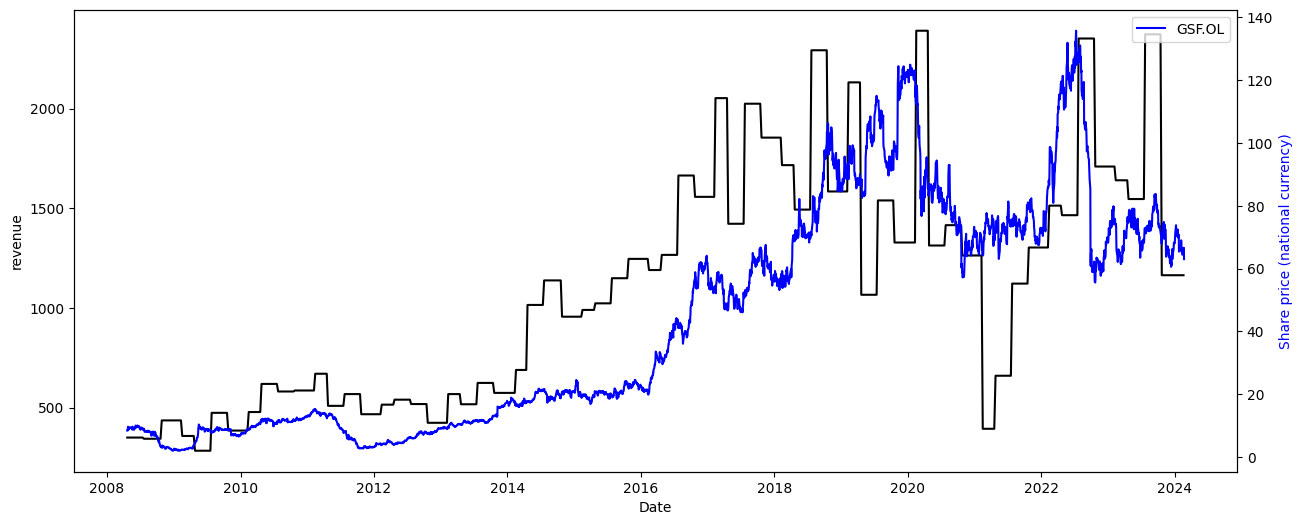

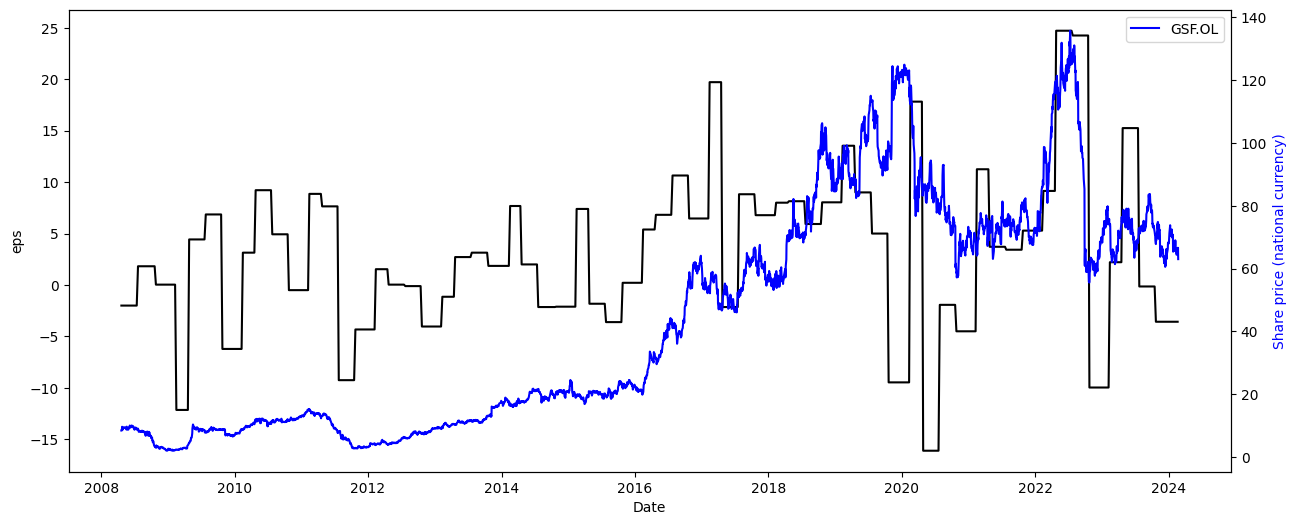

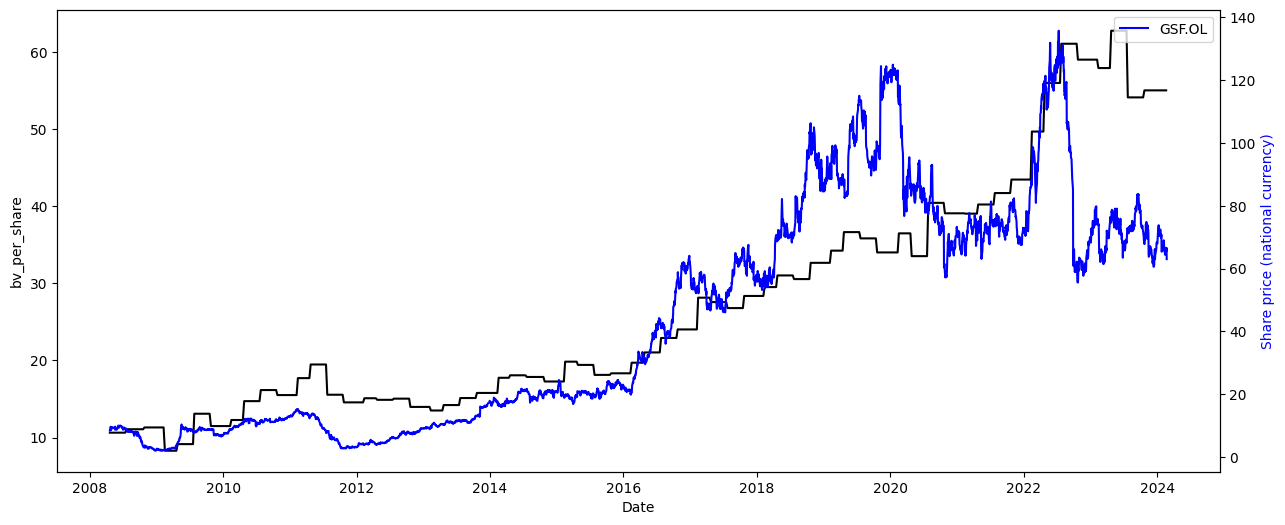

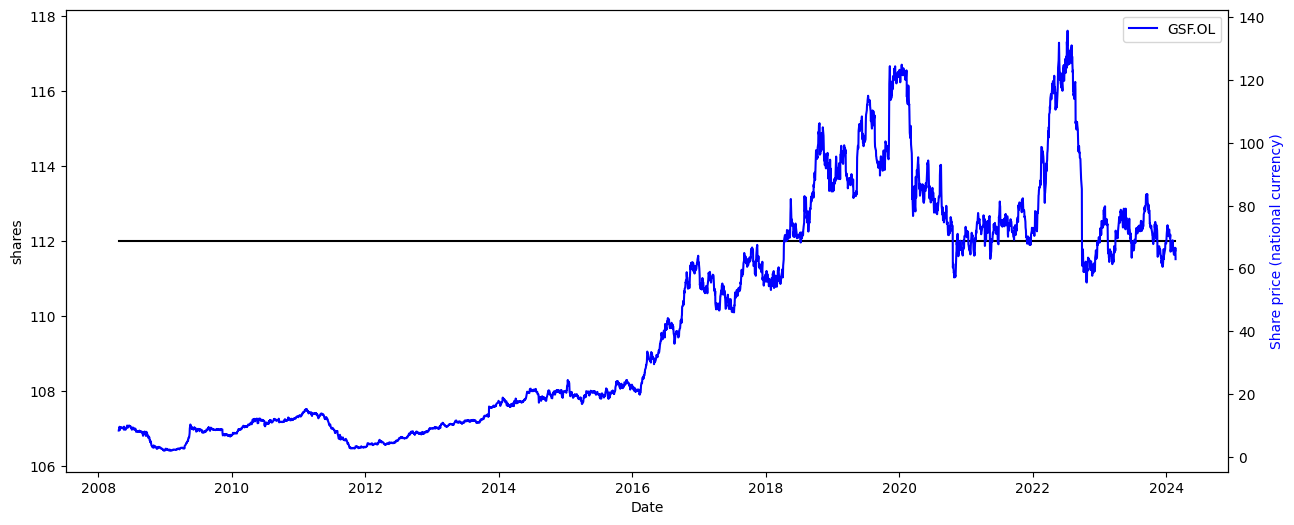

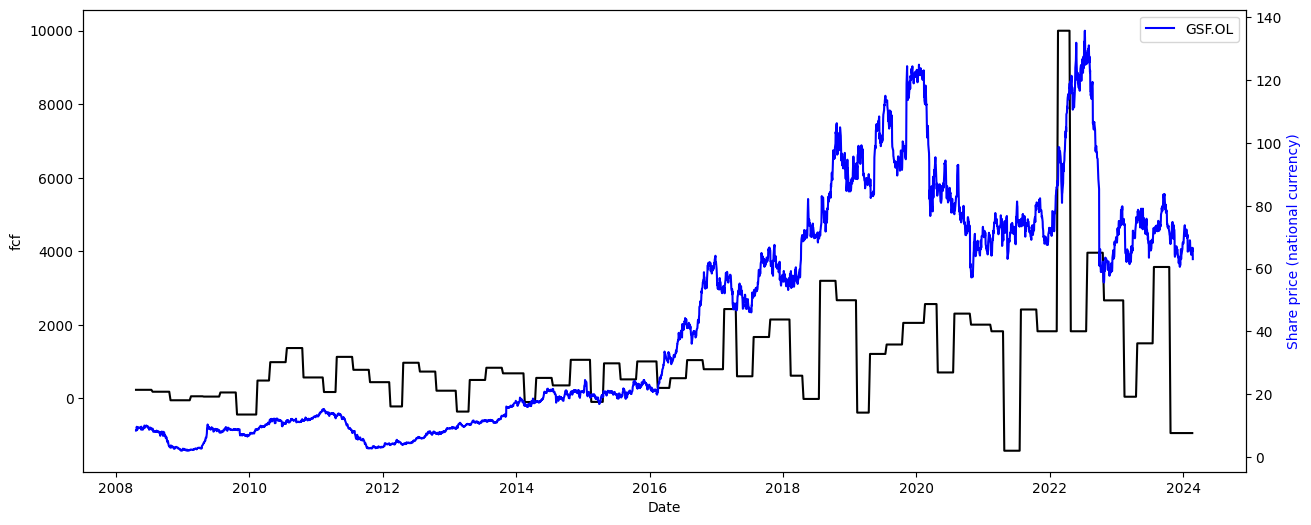

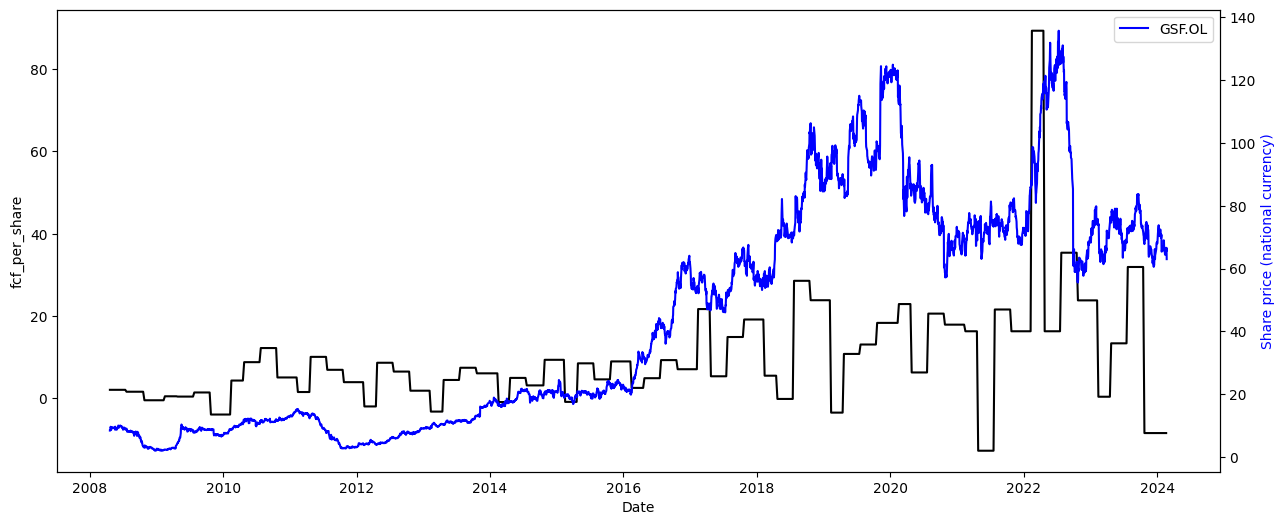

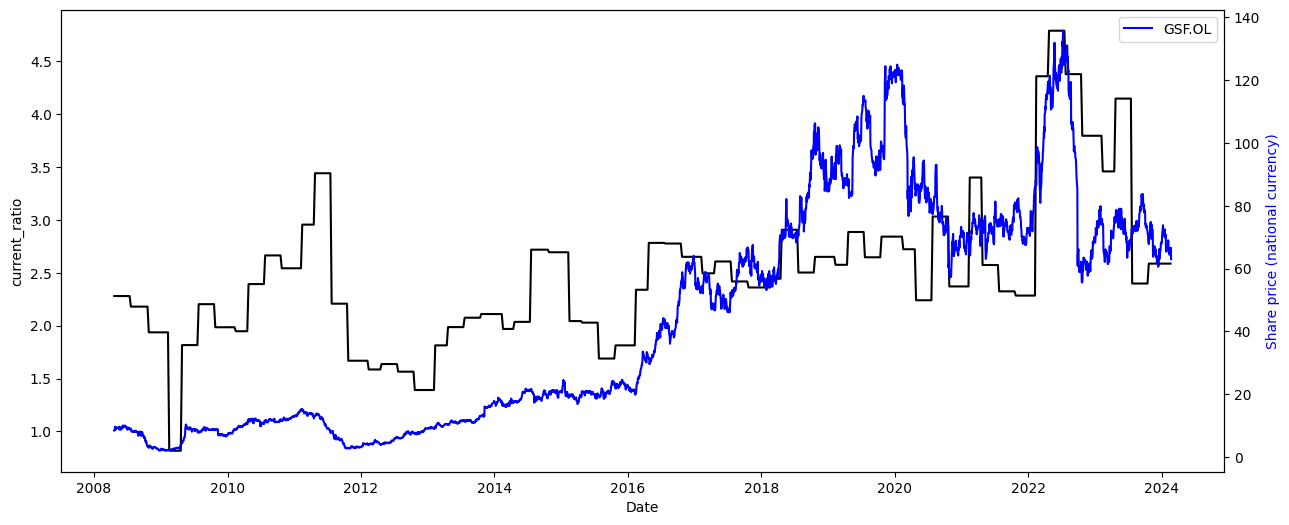

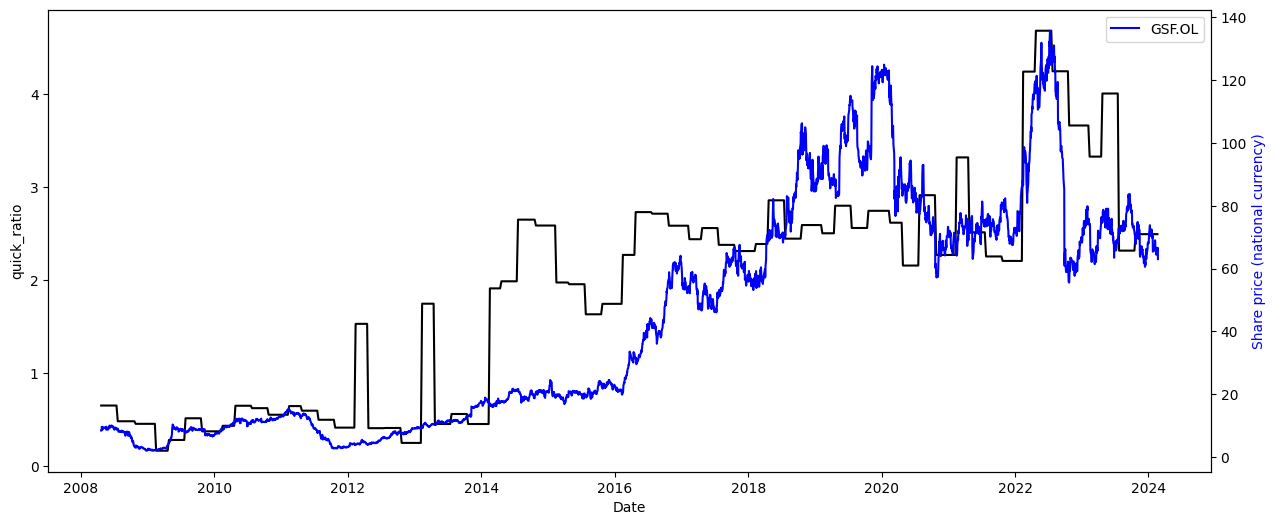

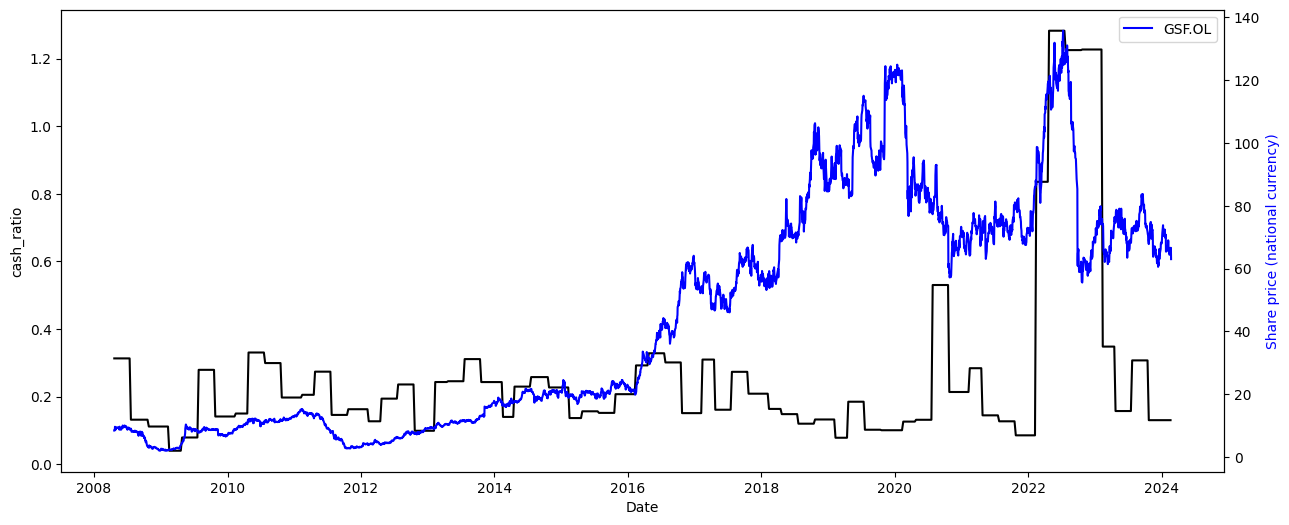

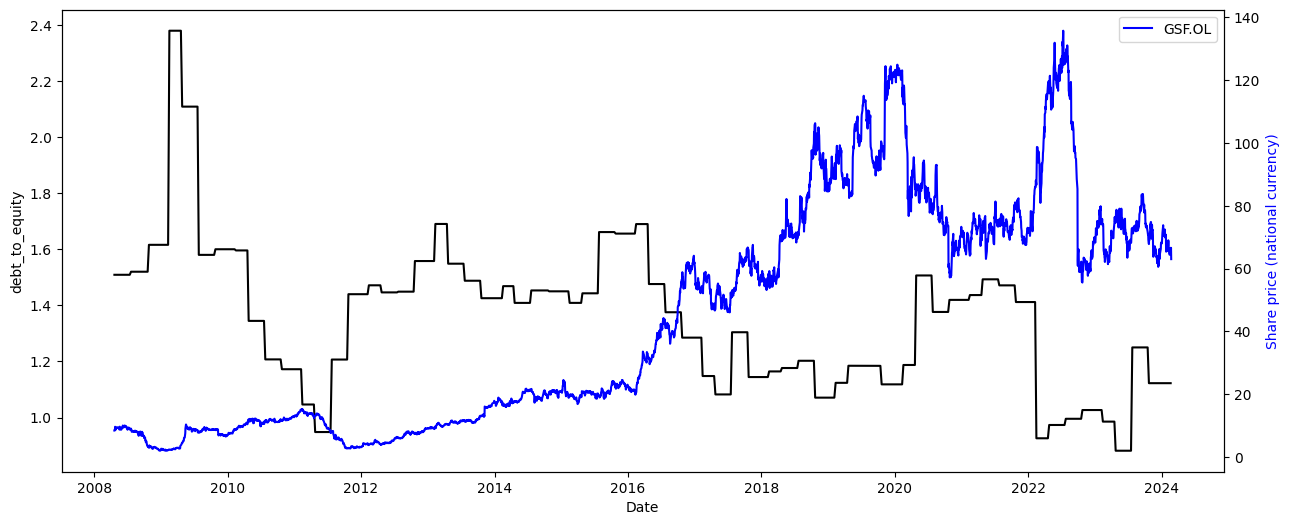

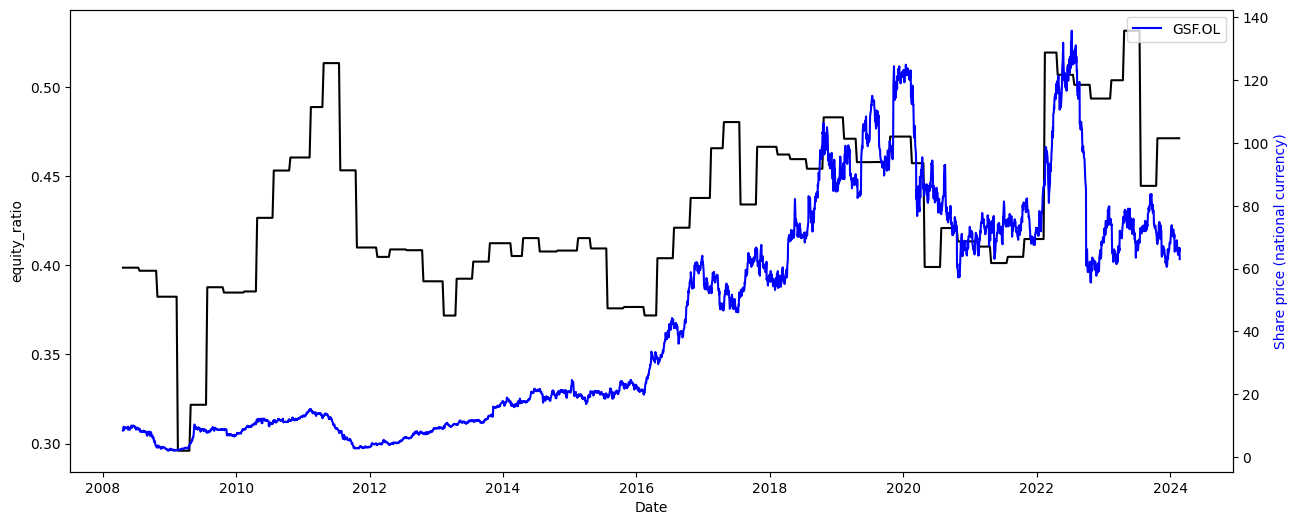

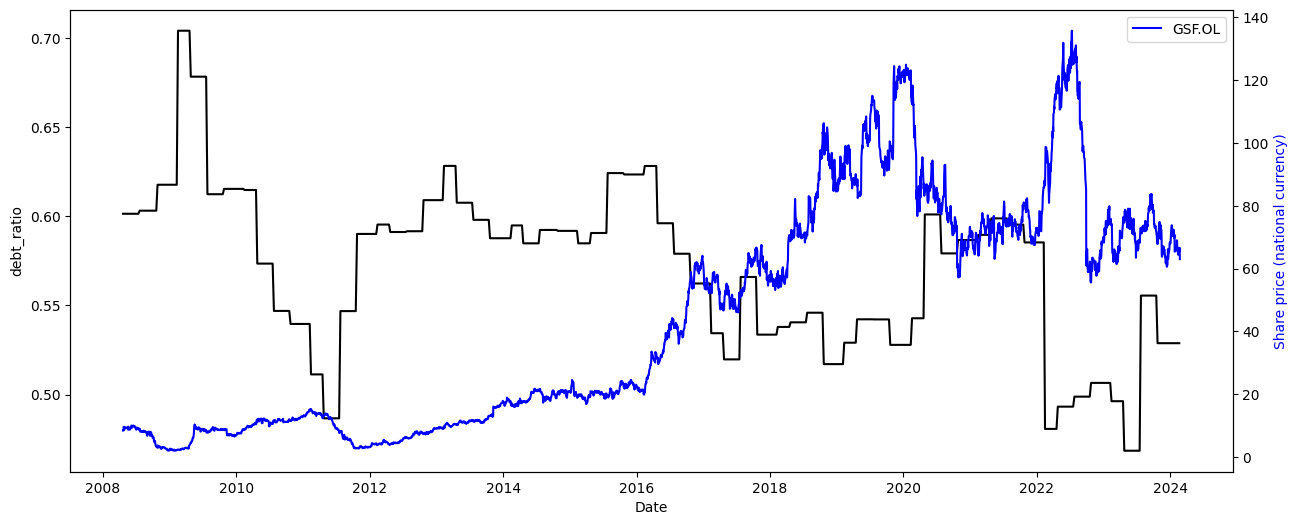

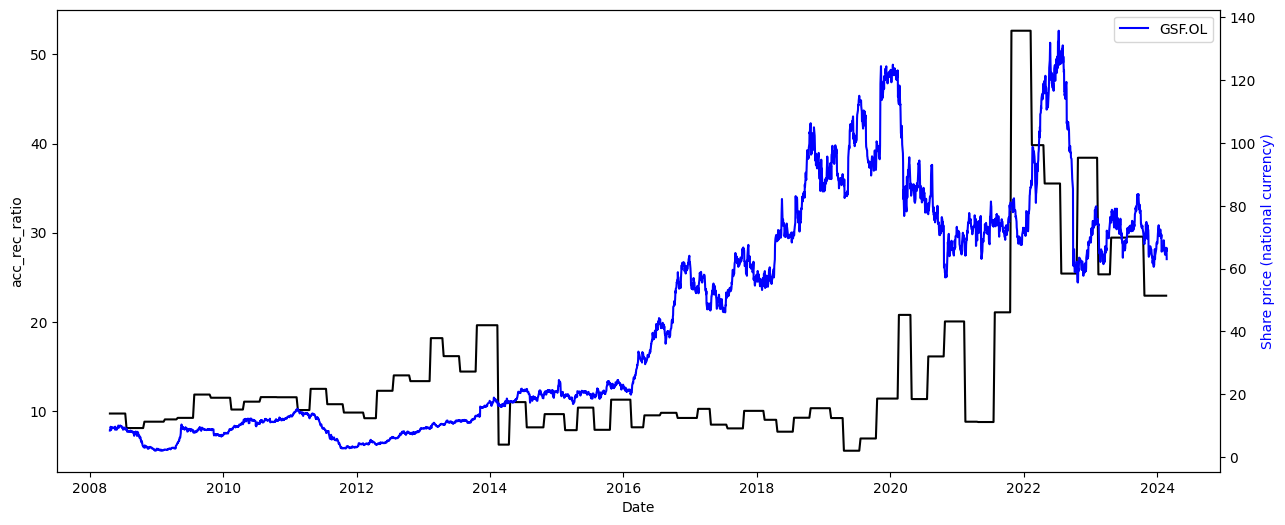

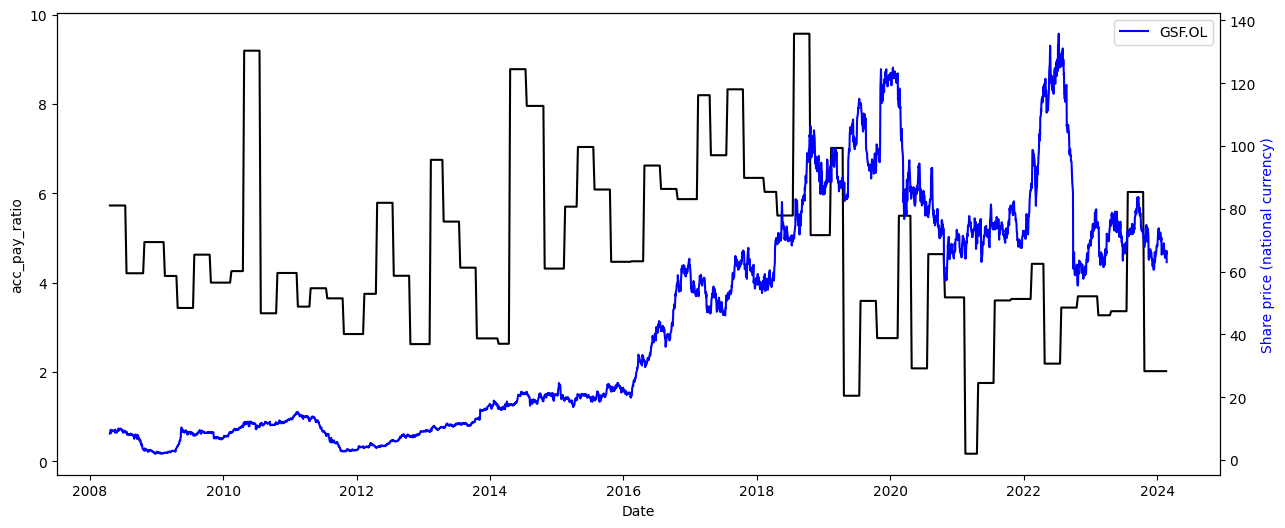

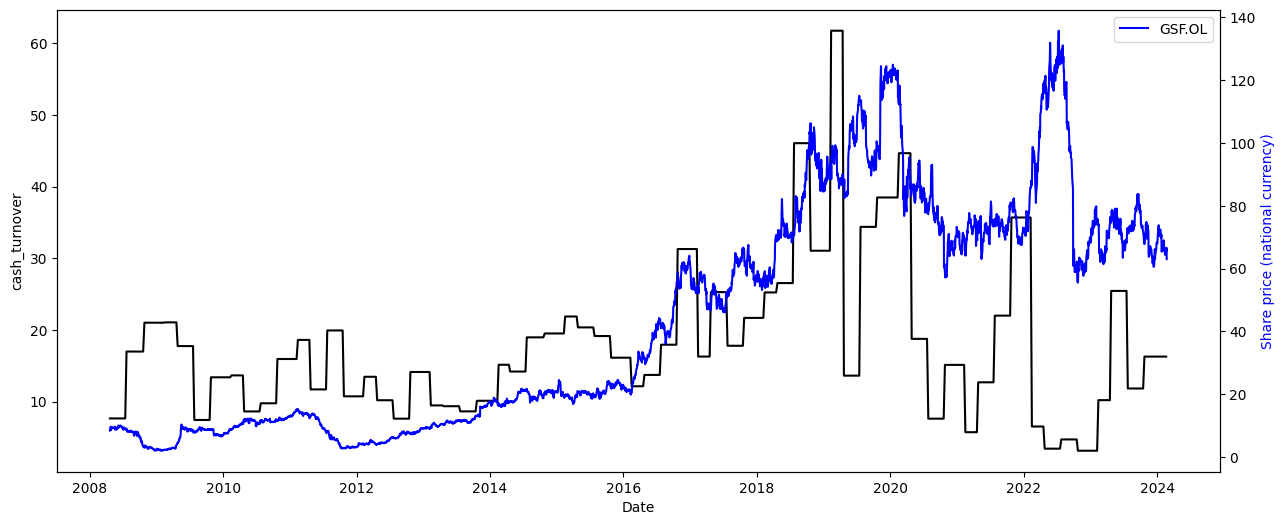

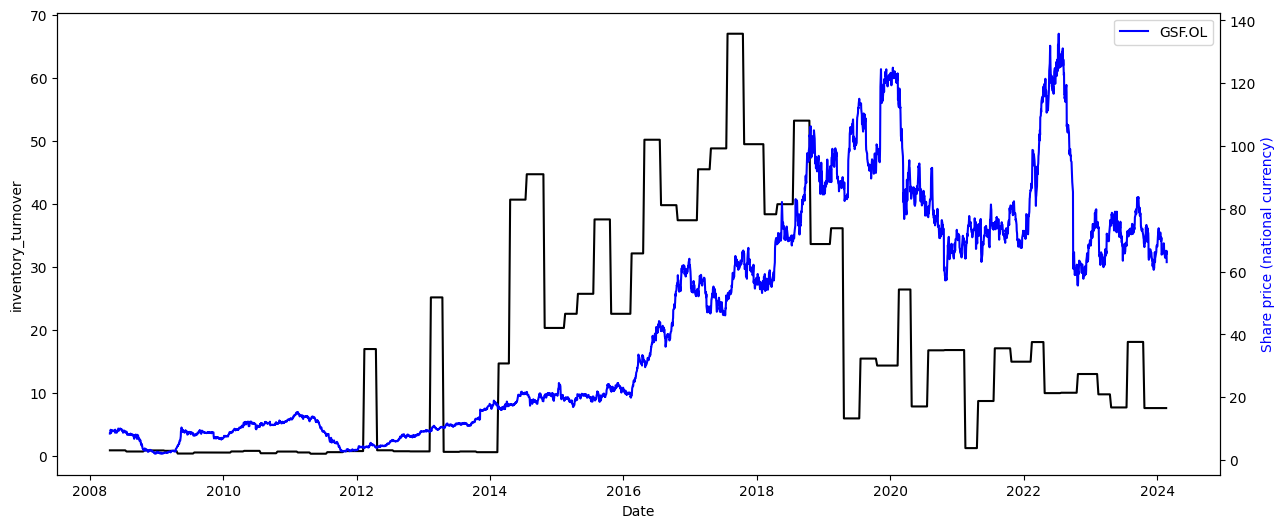

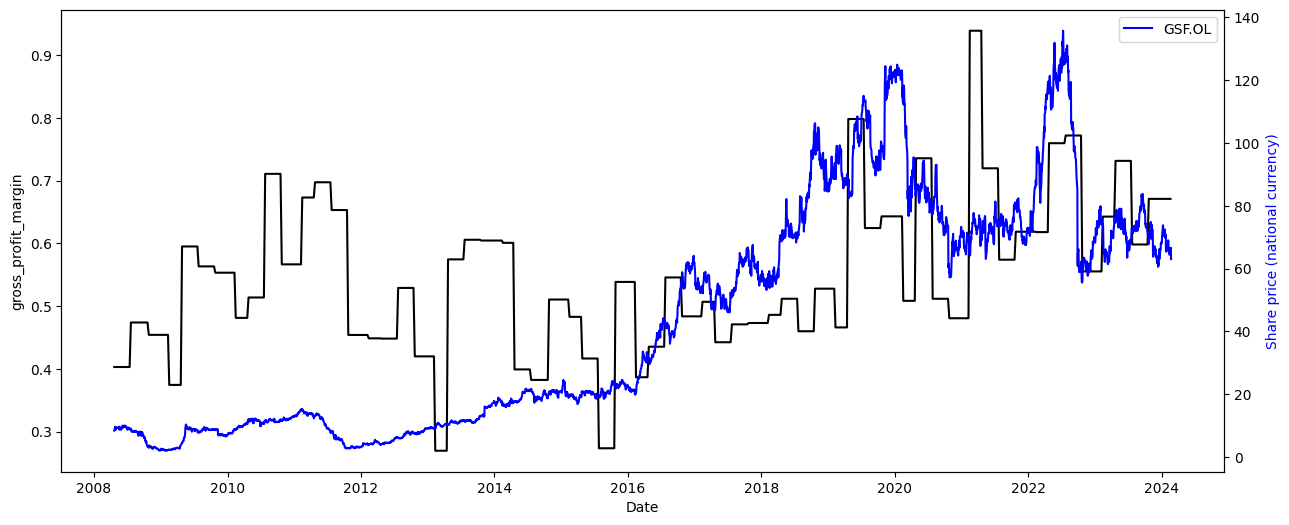

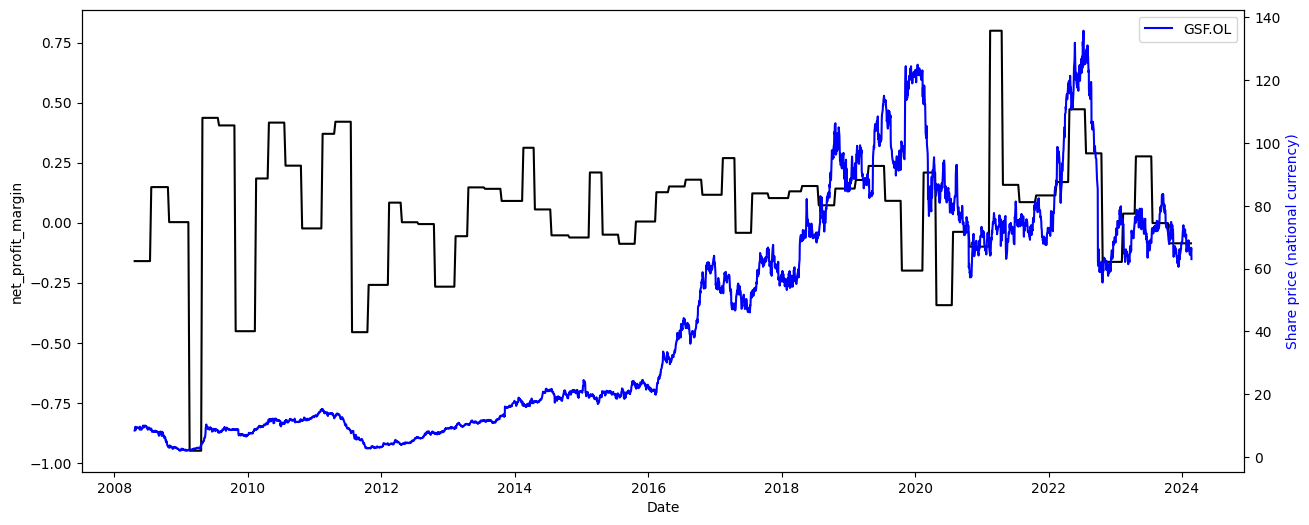

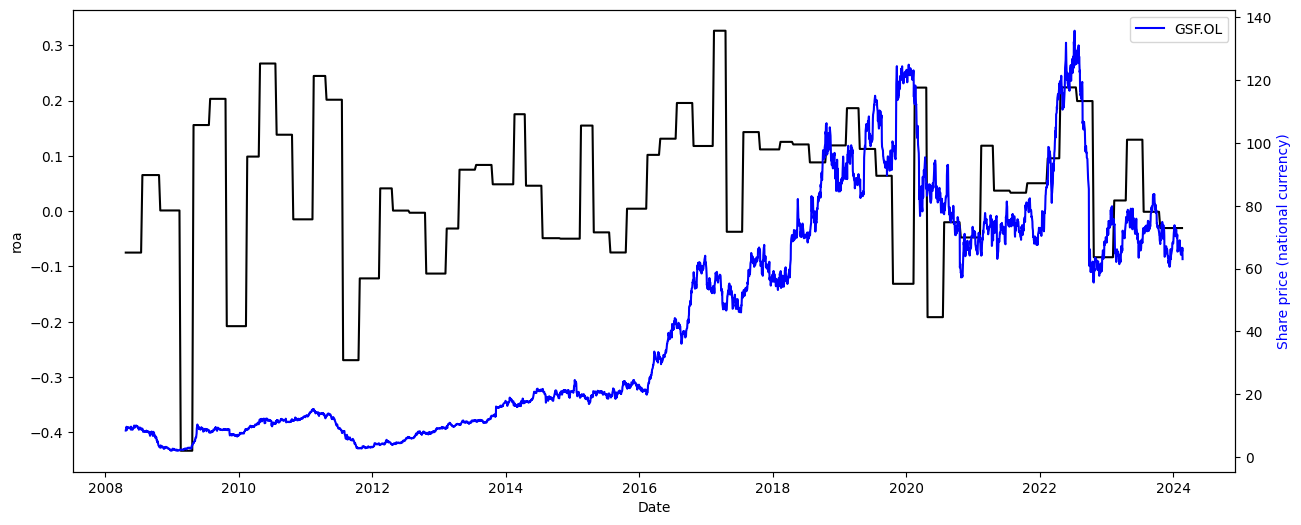

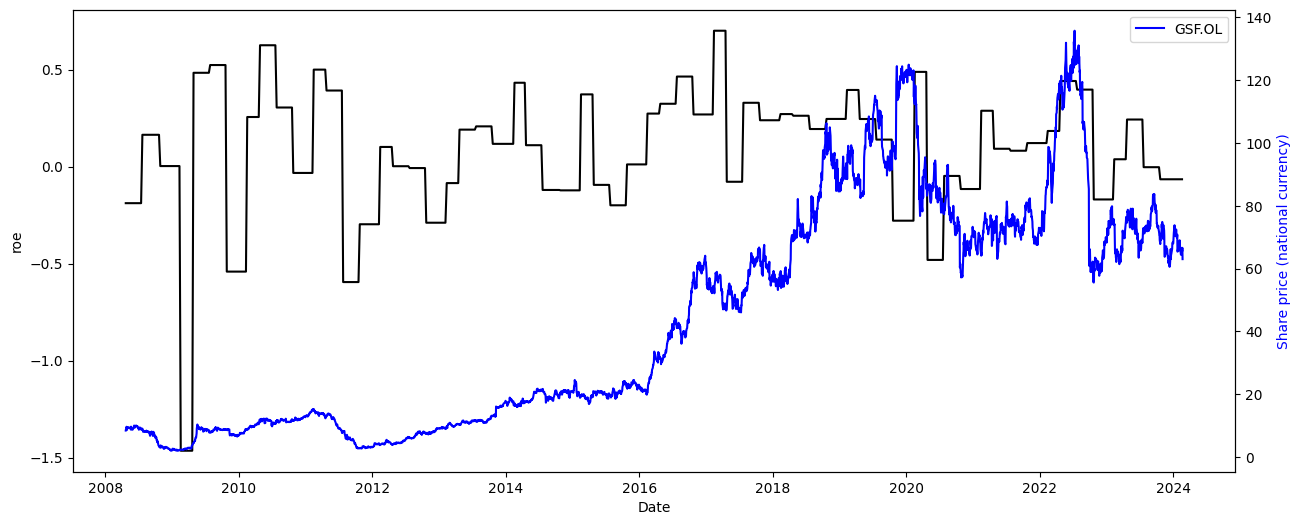

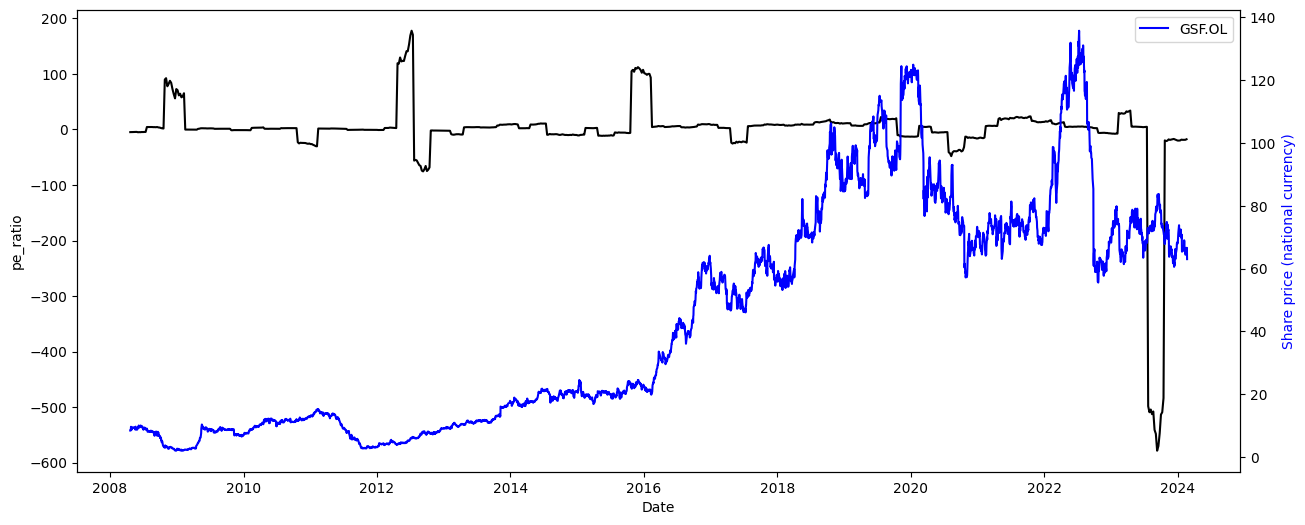

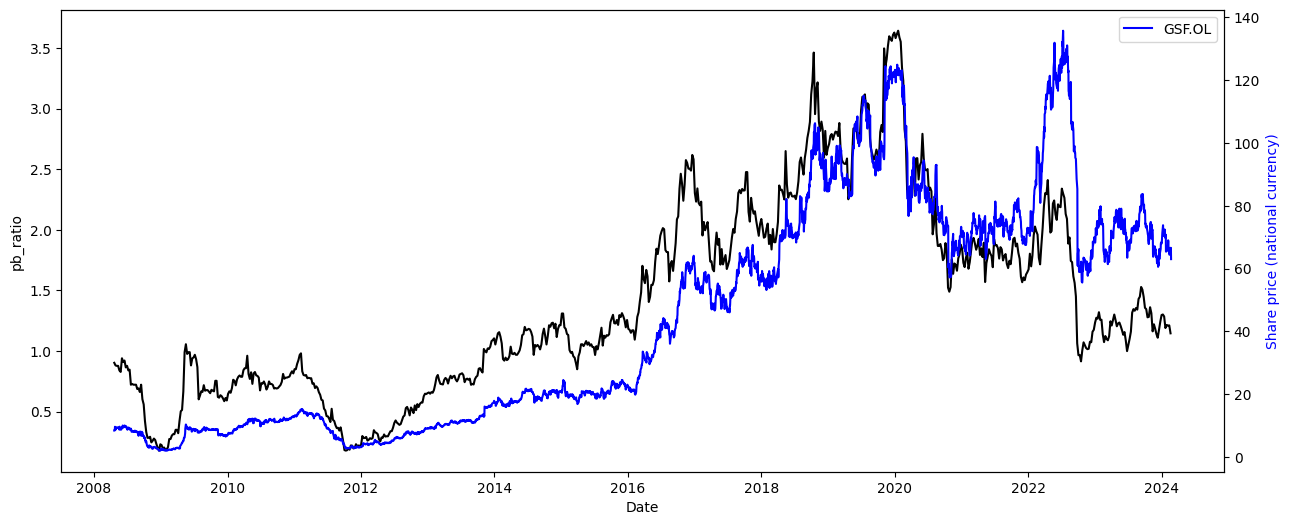

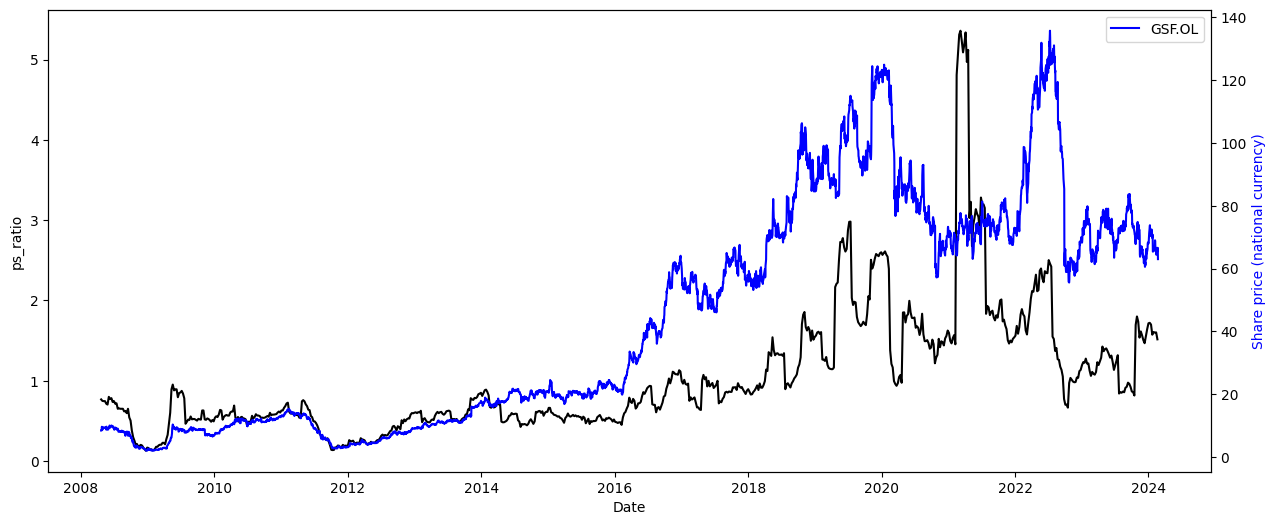

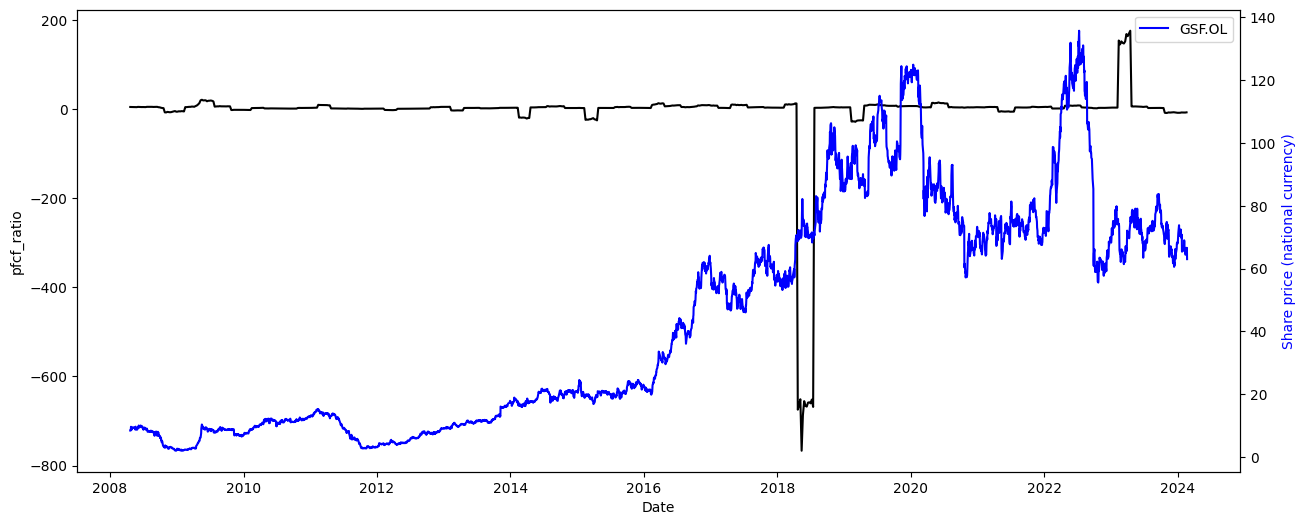

In [40]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(share_all_price.index, share_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

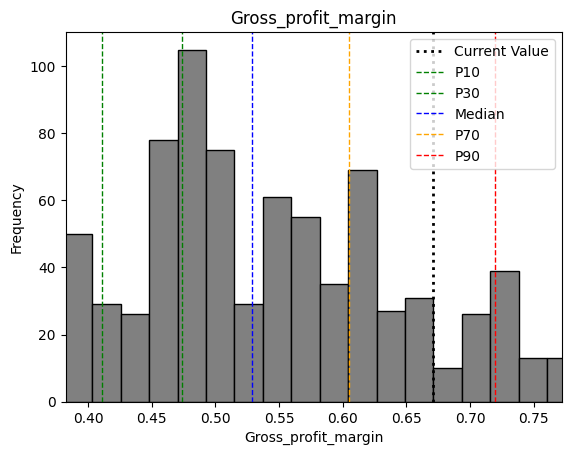

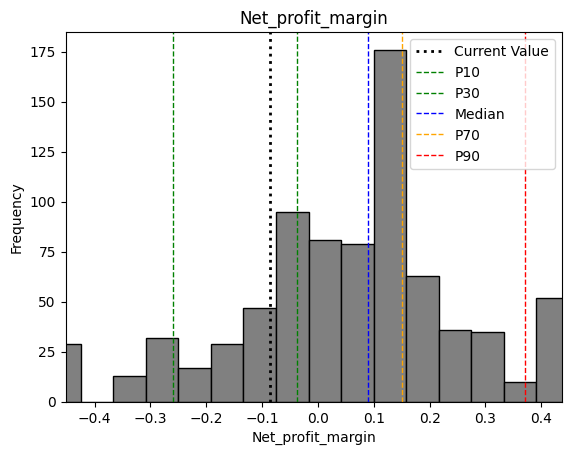

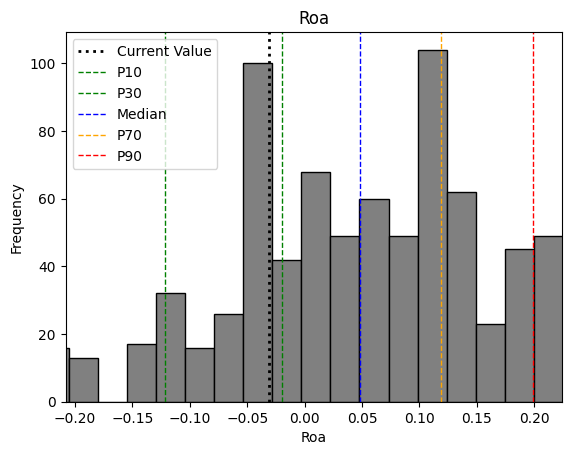

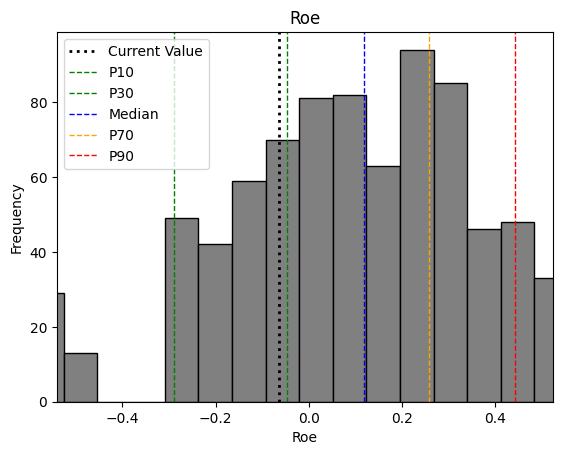

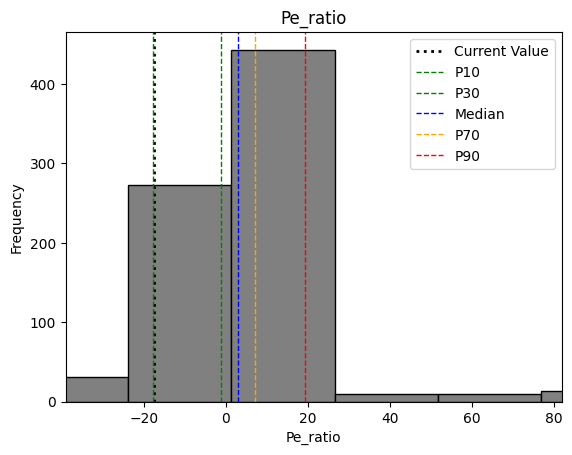

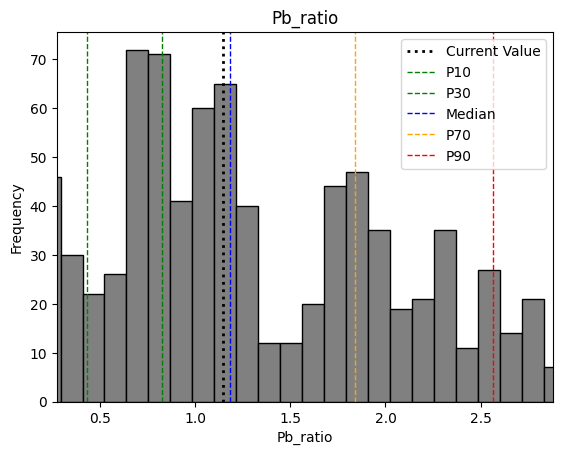

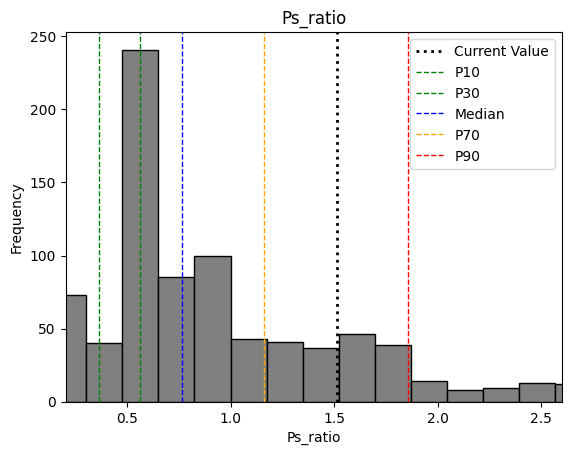

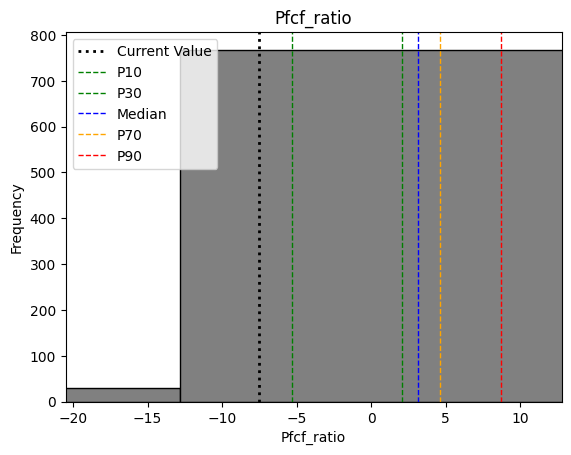

In [41]:
for column in merged_nat_curr.columns[-8:]:
    try:
        plt.hist(merged_nat_curr[column].values, bins=30, edgecolor='black', color='gray')
        plt.axvline(merged_nat_curr[column].iloc[-1], color='k', linestyle='dotted', linewidth=2, label='Current Value')
        plt.axvline(merged_nat_curr[column].quantile(0.1), color='green', linestyle='dashed', linewidth=1, label='P10')
        plt.axvline(merged_nat_curr[column].quantile(0.3), color='green', linestyle='dashed', linewidth=1, label='P30')
        plt.axvline(merged_nat_curr[column].quantile(0.5), color='blue', linestyle='dashed', linewidth=1, label='Median')
        plt.axvline(merged_nat_curr[column].quantile(0.7), color='orange', linestyle='dashed', linewidth=1, label='P70')
        plt.axvline(merged_nat_curr[column].quantile(0.9), color='red', linestyle='dashed', linewidth=1, label='P90')
        
        plt.xlabel(column.capitalize())
        plt.ylabel('Frequency')
        plt.title(column.capitalize())

        plt.xlim(merged_nat_curr[column].quantile(0.04), merged_nat_curr[column].quantile(0.96)) 
        
        plt.legend()

        plt.show()
    except:
        print(column + " diagram is missing due to error.")

## Calculate correlation between value parameters

In [42]:
corr_matrix = pd.DataFrame(merged_nat_curr, columns=['real_date', 'gross_profit_margin', 'net_profit_margin', 'roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'pfcf_ratio'])
# find independent columns
corr_matrix.corr()

,real_date,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,pfcf_ratio
real_date,1.000000,0.394968,0.135914,0.122993,0.120353,-0.213930,0.662880,0.649634,-0.024270
gross_profit_margin,0.394968,1.000000,0.394870,0.230250,0.224814,-0.057495,0.220682,0.627090,0.057820
net_profit_margin,0.135914,0.394870,1.000000,0.918387,0.928279,0.067498,0.178535,0.317694,-0.048354
roa,0.122993,0.230250,0.918387,1.000000,0.984835,0.078006,0.237750,0.117133,-0.082698
roe,0.120353,0.224814,0.928279,0.984835,1.000000,0.070181,0.230532,0.120671,-0.074099
pe_ratio,-0.213930,-0.057495,0.067498,0.078006,0.070181,1.000000,-0.026840,-0.011128,-0.011711
pb_ratio,0.662880,0.220682,0.178535,0.237750,0.230532,-0.026840,1.000000,0.645883,-0.133350
ps_ratio,0.649634,0.627090,0.317694,0.117133,0.120671,-0.011128,0.645883,1.000000,-0.038969
pfcf_ratio,-0.024270,0.057820,-0.048354,-0.082698,-0.074099,-0.011711,-0.133350,-0.038969,1.000000


In [43]:
tolerance = 0.2

In [44]:
gpm = merged_nat_curr[(merged_nat_curr['gross_profit_margin']<= merged_nat_curr['gross_profit_margin'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['gross_profit_margin']>= merged_nat_curr['gross_profit_margin'].iloc[-1] * (1- tolerance))]['date'].values
roe = merged_nat_curr[(merged_nat_curr['roe']<= merged_nat_curr['roe'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['roe']>= merged_nat_curr['roe'].iloc[-1] * (1- tolerance))]['date'].values
per = merged_nat_curr[(merged_nat_curr['pe_ratio']<= merged_nat_curr['pe_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pe_ratio']>= merged_nat_curr['pe_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pbr = merged_nat_curr[(merged_nat_curr['pb_ratio']<= merged_nat_curr['pb_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pb_ratio']>= merged_nat_curr['pb_ratio'].iloc[-1] * (1- tolerance))]['date'].values
psr = merged_nat_curr[(merged_nat_curr['ps_ratio']<= merged_nat_curr['ps_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['ps_ratio']>= merged_nat_curr['ps_ratio'].iloc[-1] * (1- tolerance))]['date'].values
pfcfr = merged_nat_curr[(merged_nat_curr['pfcf_ratio']<= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1+tolerance)) & (merged_nat_curr['pfcf_ratio']>= merged_nat_curr['pfcf_ratio'].iloc[-1] * (1- tolerance))]['date'].values

In [49]:
#test3 =  utils.list_intersect(gpm, roe)
#test4 =  utils.list_intersect(test3, per)
#test5 =  utils.list_intersect(test4, pbr)
test6 =  utils.list_intersect(pbr, psr)
#test7 =  utils.list_intersect(test6, pfcfr)
print(len(test6), 'timestemos have been found!')

60 timestemos have been found!


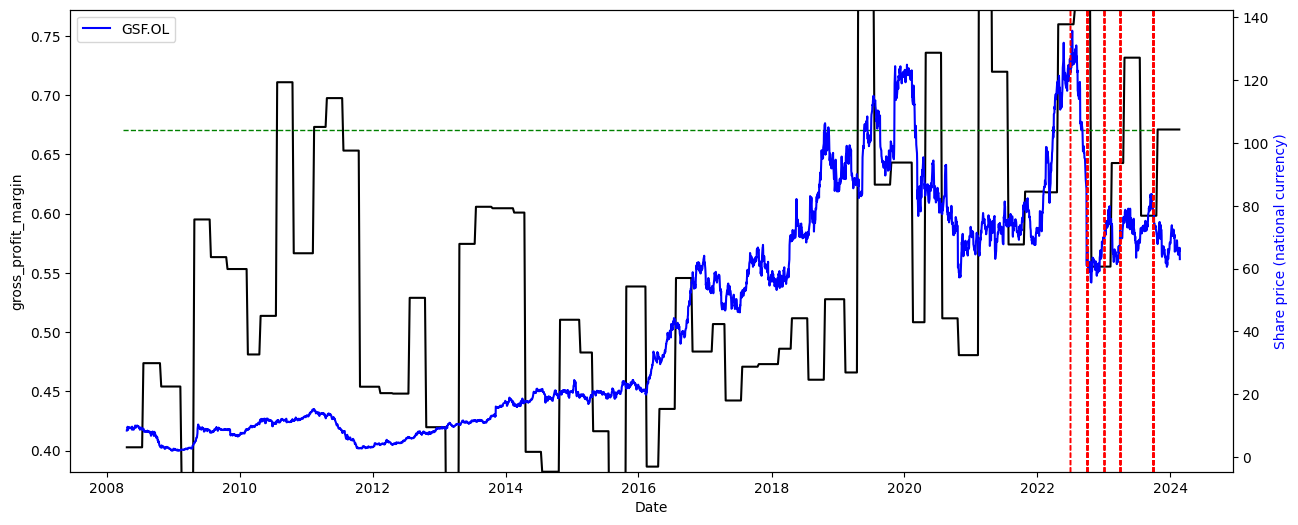

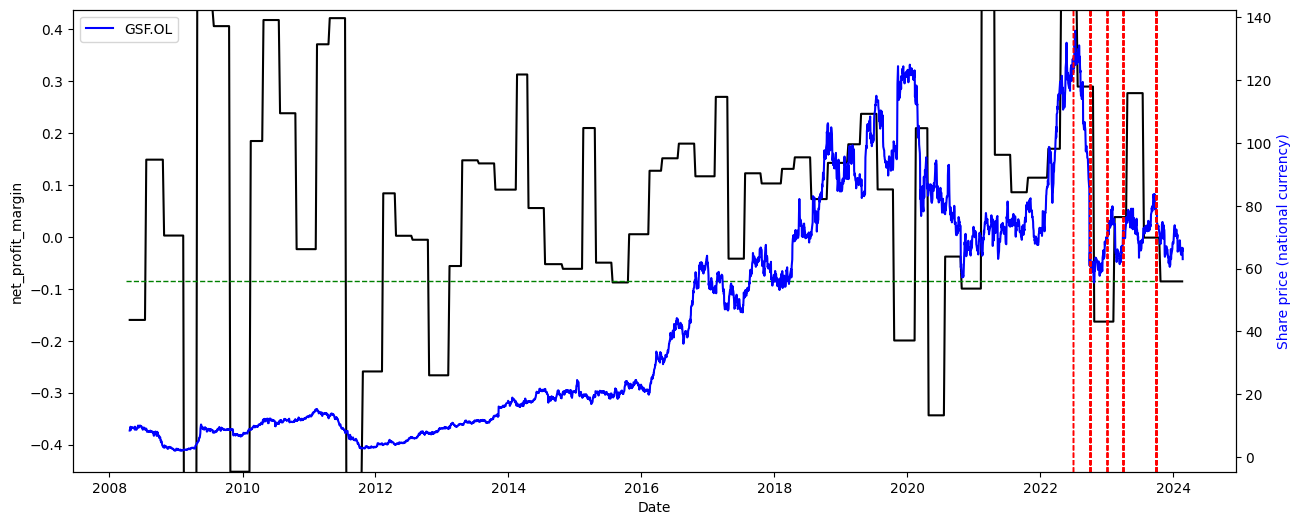

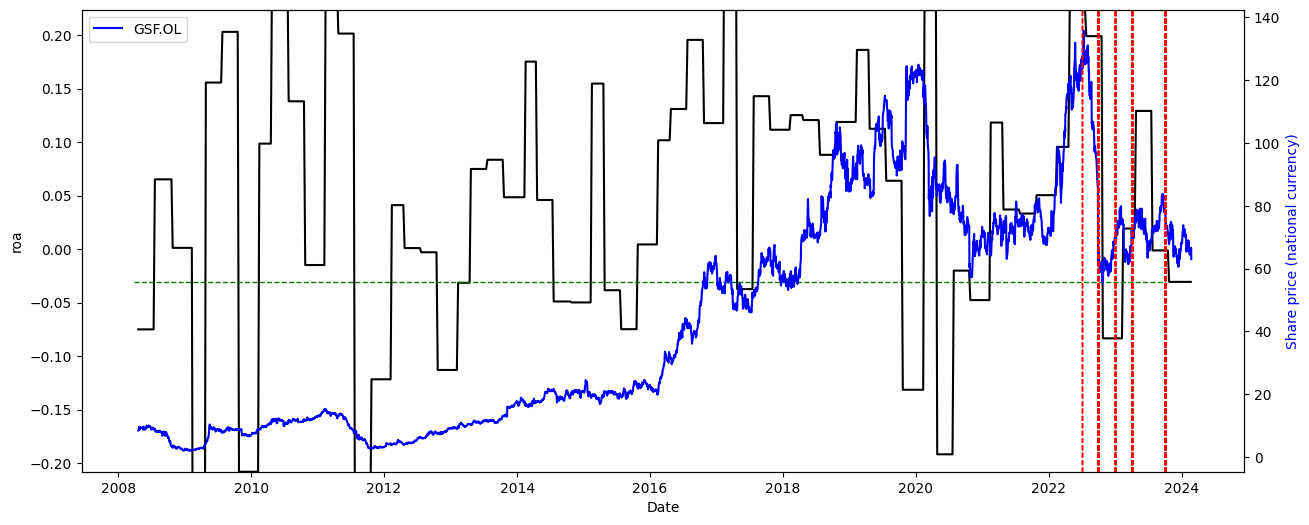

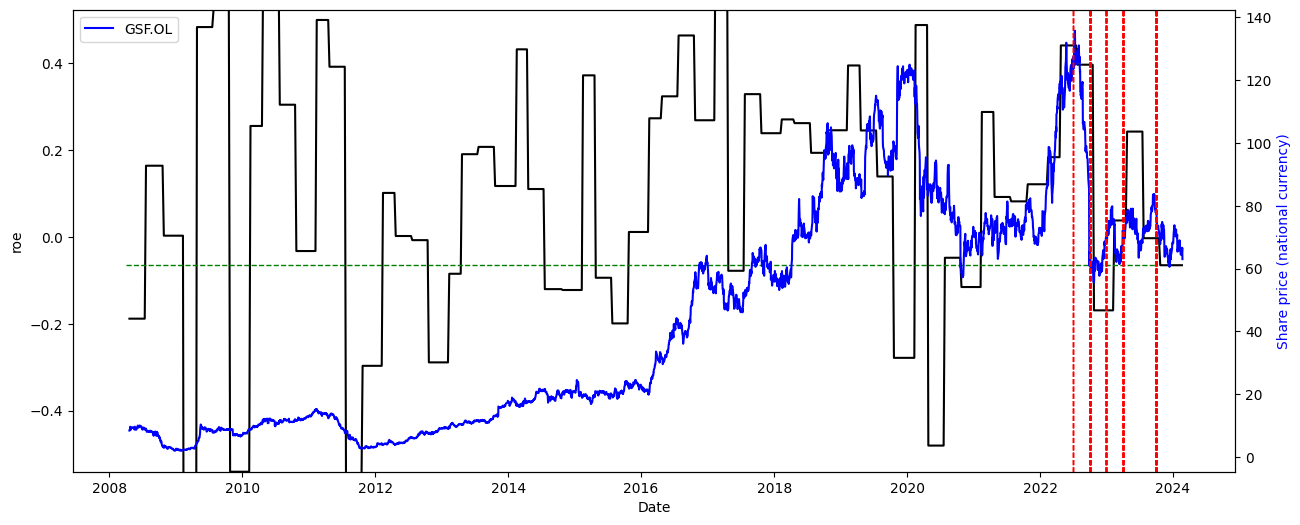

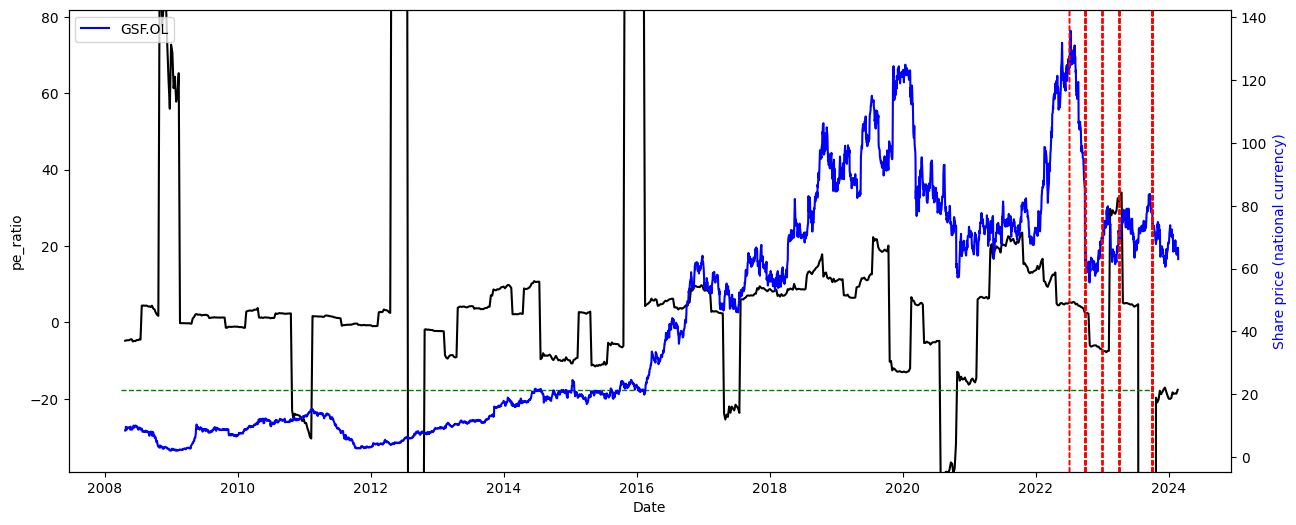

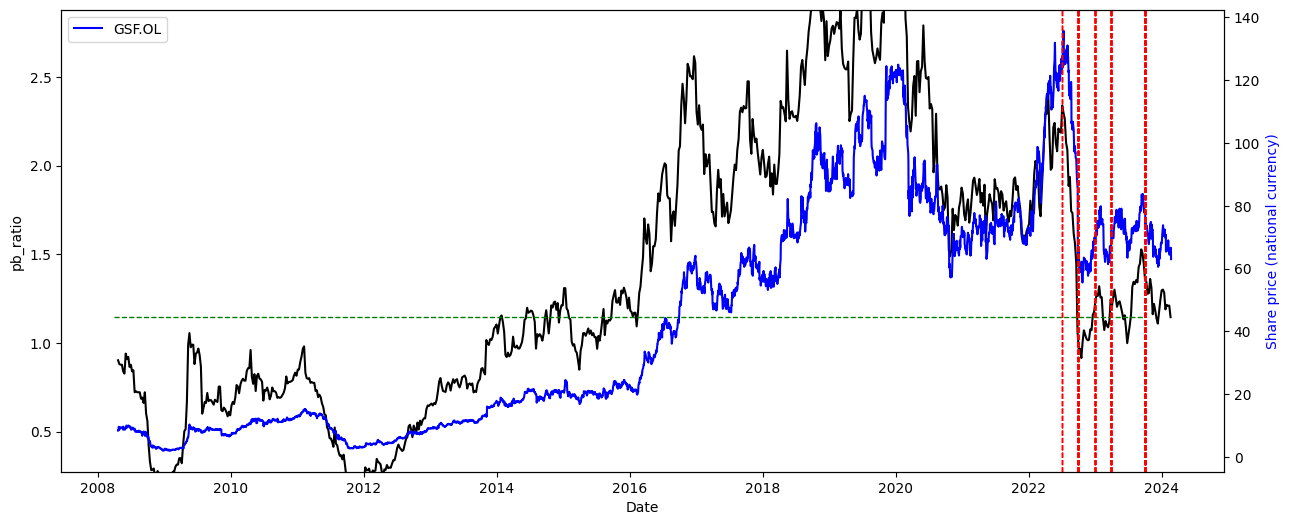

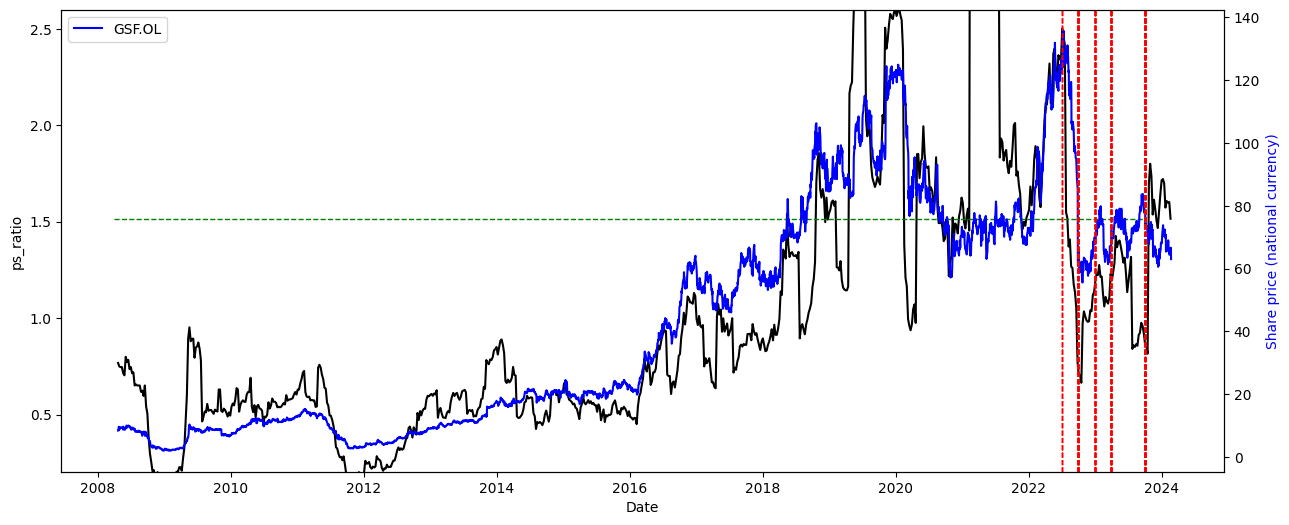

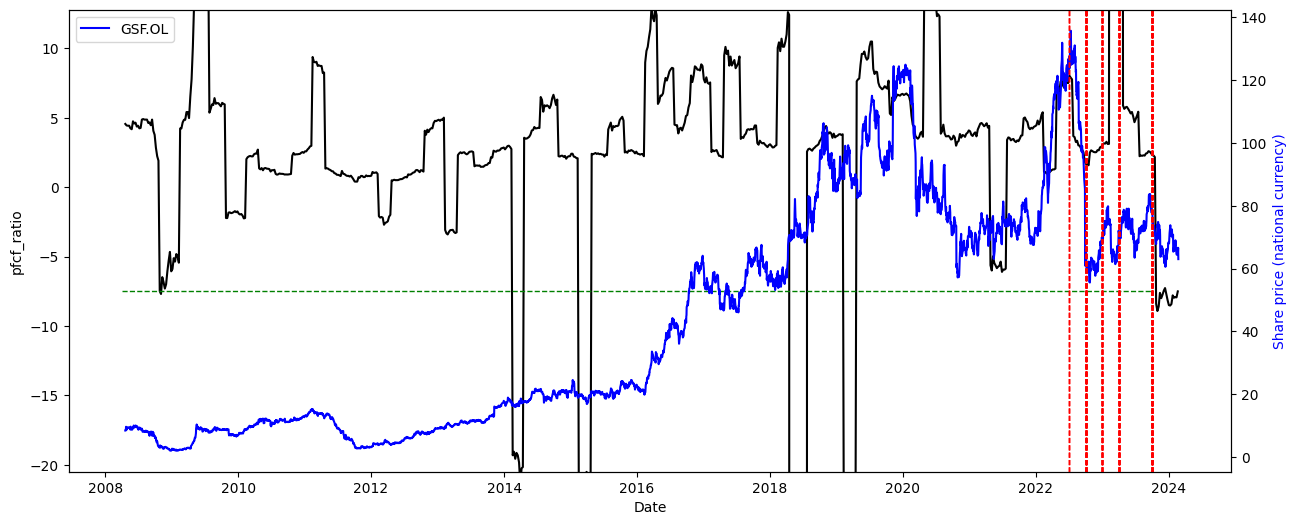

In [50]:
for column in merged_nat_curr.columns[-8:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(share_all_price.index, share_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax1.set_ylim(merged_nat_curr[column].quantile(0.04), merged_nat_curr[column].quantile(0.96)) 
    ax2.set_ylabel('Share price (national currency)', color='b')

    for timestamp in test6:
        plt.axvline(timestamp, color='red', linestyle='dashed', linewidth=1)

    ax1.hlines(
        y=merged_nat_curr[column].iloc[-1],
        xmin=merged_nat_curr.date.min(),
        xmax=merged_nat_curr.date.max(),
        linewidth=1, linestyles='dashed',
        color='green',
        )
    

    plt.legend()
    plt.show()